In [1]:
from SA import *

In [2]:
# Load and process adata
adata = sc.read("/Users/AlexanderWang/Desktop/Califano_Lab_Fall_2021/LNCaPF21_project/data/LNCaPWT_R6/gExpr/LNCaPWT_STEP06_gExpr_ANNDATA_convert_mat_to_AnnData/LNCaPWT_SCE_anndata_gExpr_filt_geneNames.h5ad")
sc.pp.normalize_total(adata, inplace=True,target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata)
sc.tl.pca(adata, svd_solver='arpack', random_state=0)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000, inplace=True)

/Users/AlexanderWang/opt/miniconda3/lib/python3.8/site-packages/scanpy/preprocessing/_utils.py:11: RuntimeWarning: overflow encountered in multiply
  mean_sq = np.multiply(X, X).mean(axis=axis, dtype=np.float64)


In [3]:
# Run SA clustering
adata = run_fastclust_SA_clustering(adata, maxiter = 10, res_range = [0.01, 2], NN_range = [3,30])

Computing distance object...
Beginning Simulated Annealing clustering...


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
dual_annealing: 100%|███████████████████████████| 10/10 [00:37<00:00,  3.78s/it]


In [4]:
# Optimal clusters
adata.obs["SA_clusters"]

AAACCTGCATCCGCGA.1    0
AAACCTGTCCGAATGT.1    0
AAACCTGTCCGCTGTT.1    0
AAACCTGTCTAACCGA.1    0
AAACGGGAGACTAGAT.1    0
                     ..
TTTGTCAGTTGGTTTG.1    0
TTTGTCATCAAGGTAA.1    1
TTTGTCATCACCCGAG.1    0
TTTGTCATCGAATCCA.1    1
TTTGTCATCTTGAGAC.1    0
Name: SA_clusters, Length: 2450, dtype: category
Categories (2, object): ['0', '1']

In [5]:
# Information on the run
print(adata.SA_results_dict["search_df"])

   iter n_pcs resolution knn n_clust subsamp_iter   sil_avg seed
0     1    50   1.102139  22      15            1  0.130489    1
1     2    50   1.298408   5      25            1  0.114915    1
2     3    50   1.067674  24      14            1  0.157339    1
3     4    50   1.922356  24      23            1  0.125946    1
4     5    50   1.922356  29      19            1  0.134995    1
5     6    50   1.067674  24      14            1  0.157339    1
6     7    50   1.067674  24      14            1  0.157339    1
7     8    50   1.067674  24      14            1  0.157339    1
8     9    50   1.652819  24      19            1  0.129651    1
9    10    50   0.541356  17       9            1  0.169905    1
10   11    50   1.111422  17      18            1  0.127064    1
11   12    50   1.111422  16      17            1  0.112871    1
12   13    50   0.541356  17       9            1  0.169905    1
13   14    50   0.541356  17       9            1  0.169905    1
14   15    50   0.541356 

In [6]:
print(adata.SA_results_dict["opt_result"])

     fun: -0.5709507060583795
 message: ['Maximum number of iteration reached']
    nfev: 53
    nhev: 0
     nit: 10
    njev: 4
  status: 0
 success: True
       x: array([ 0.1081056 , 23.14613396])


In [7]:
print(adata.SA_results_dict["run_params"])

{'res_range': [0.01, 2], 'NN_range': [3, 30], 'use_reduction': True, 'reduction_slot': 'X_pca', 'SS_weights': 'unitary', 'SS_exp_base': 2.718282, 'clust_alg': 'Leiden', 'n_subsamples': 1, 'subsamples_pct_cells': 100, 'maxiter': 10, 'initial_temp': 5230, 'restart_temp_ratio': 2e-05, 'visit': 2.62, 'accept': -5.0, 'maxfun': 10000000.0, 'seed': 0}


In [8]:
# Information on the run search plots
search_plt_sil_avg = get_SA_search_plot(adata, "sil_avg")
search_plt_iter = get_SA_search_plot(adata, "iter")
search_plt_n_clust = get_SA_search_plot(adata, "n_clust")

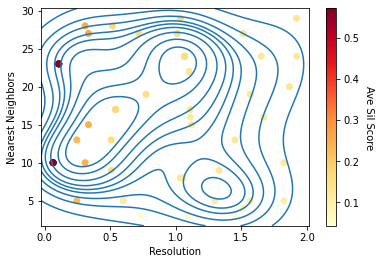

In [9]:
search_plt_sil_avg

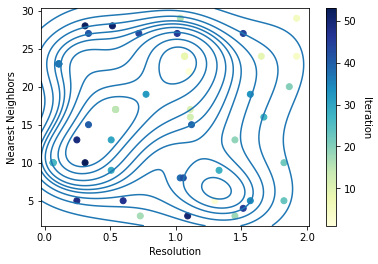

In [10]:
search_plt_iter

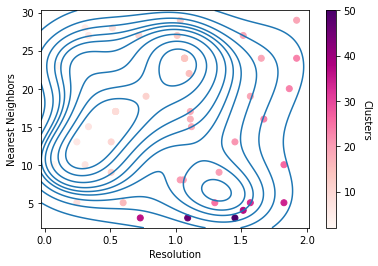

In [11]:
search_plt_n_clust

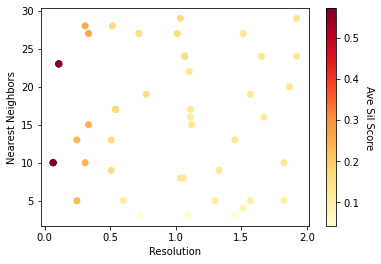

In [12]:
# Information on the run search plots
search_plt_sil_avg_noDensity = get_SA_search_plot(adata, "sil_avg", plot_density = False)
search_plt_sil_avg_noDensity